## 数据导入

In [1]:
import keras
import numpy as np
from keras.datasets import reuters
import matplotlib.pyplot as plt
%matplotlib inline
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#查看数据集大小
print("训练集大小：",train_data.shape)
print("测试集大小：",test_data.shape)

训练集大小： (8982,)
测试集大小： (2246,)


In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


看来reuters和imdb一样，每条样本长度不一致，只是代表了索引

In [4]:
from collections import Counter
Counter(train_labels)

Counter({0: 55,
         1: 432,
         2: 74,
         3: 3159,
         4: 1949,
         5: 17,
         6: 48,
         7: 16,
         8: 139,
         9: 101,
         10: 124,
         11: 390,
         12: 49,
         13: 172,
         14: 26,
         15: 20,
         16: 444,
         17: 39,
         18: 66,
         19: 549,
         20: 269,
         21: 100,
         22: 15,
         23: 41,
         24: 62,
         25: 92,
         26: 24,
         27: 15,
         28: 48,
         29: 19,
         30: 45,
         31: 39,
         32: 32,
         33: 11,
         34: 50,
         35: 10,
         36: 49,
         37: 19,
         38: 19,
         39: 24,
         40: 36,
         41: 30,
         42: 13,
         43: 21,
         44: 12,
         45: 18})

居然有46个类别，我的天啊

In [5]:
# 老规矩one-hot
def one_hot(data,dimension=10000):
    res= np.zeros([len(data),dimension])
    for i,item in enumerate(data):
        res[i,item]=1
    return res

In [6]:
x_train= one_hot(train_data)
x_test= one_hot(test_data)

In [7]:
print("训练集形状：",x_train.shape)
print("测试集形状：",x_test.shape)

训练集形状： (8982, 10000)
测试集形状： (2246, 10000)


## 搭建模型

In [8]:
from keras.layers import Dense
from keras import models
def model():
    model= models.Sequential()
    model.add(Dense(128,input_dim=10000,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(46,activation="softmax"))
    model.compile(optimizer="rmsprop",loss='sparse_categorical_crossentropy',metrics=['acc'])
    return model

In [9]:
model= model()

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
_________________________________________________________________


In [11]:
history= model.fit(x_train,train_labels,epochs=20,batch_size=256,validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/20
6287/6287 [==============================] - 5s 789us/step - loss: 2.0297 - acc: 0.5588 - val_loss: 1.3296 - val_acc: 0.7202
Epoch 2/20
6287/6287 [==============================] - 2s 240us/step - loss: 1.0584 - acc: 0.7765 - val_loss: 1.0921 - val_acc: 0.7737
Epoch 3/20
6287/6287 [==============================] - 1s 227us/step - loss: 0.7004 - acc: 0.8545 - val_loss: 1.0326 - val_acc: 0.7711
Epoch 4/20
6287/6287 [==============================] - 1s 227us/step - loss: 0.4762 - acc: 0.9027 - val_loss: 0.9302 - val_acc: 0.8074
Epoch 5/20
6287/6287 [==============================] - 1s 224us/step - loss: 0.3284 - acc: 0.9322 - val_loss: 0.9144 - val_acc: 0.8045
Epoch 6/20
6287/6287 [==============================] - 1s 230us/step - loss: 0.2383 - acc: 0.9496 - val_loss: 0.9512 - val_acc: 0.8019
Epoch 7/20
6287/6287 [==============================] - 1s 228us/step - loss: 0.1888 - acc: 0.9561 - val_loss: 0.9528 - val_acc: 0.8026


In [28]:
model.save("reuters.h5")

In [12]:
loss,acc= model.evaluate(x_test,test_labels)

2246/2246 [==============================] - 1s 550us/step


In [13]:
print("测试损失：",loss)
print("测试精度：",acc)

测试损失： 1.4059196648
测试精度： 0.777827248495


## 绘制验证精度和损失变化曲线

In [14]:
#绘制损失变化曲线
acc= history.history['acc']
val_acc= history.history["val_acc"]
loss= history.history['loss']
val_loss= history.history["val_loss"]

In [17]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

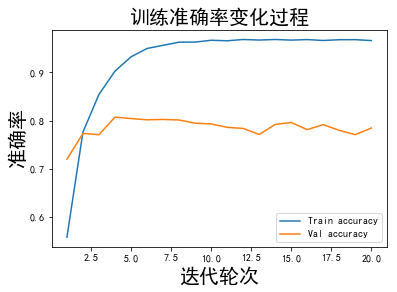

In [18]:
plt.plot(range(1,len(acc)+1),acc,label="Train accuracy")
plt.plot(range(1,len(val_acc)+1),val_acc,label="Val accuracy")
plt.xlabel("迭代轮次",fontsize=20)
plt.ylabel("准确率",fontsize=20)
plt.title("训练准确率变化过程",fontsize=20)
plt.legend()

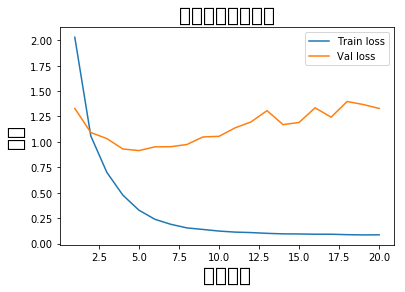

In [16]:
plt.plot(range(1,len(loss)+1),loss,label="Train loss")
plt.plot(range(1,len(val_loss)+1),val_loss,label="Val loss")
plt.xlabel("迭代轮次",fontsize=20)
plt.ylabel("损失",fontsize=20)
plt.title("训练损失变化过程",fontsize=20)
plt.legend()